In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\91852\OneDrive\Desktop\BMC\cl_input.csv")

In [2]:
data.head()

,0,1,2,3,4,5,6,7
0,0.650213,-0.381975,-0.522629,0.242820,1.091880,0.464210,0.305443,0.249065
1,0.199449,-0.065467,-0.035291,-0.038917,-0.008560,-0.076543,0.353438,0.053782
2,0.509308,-0.484385,1.213731,0.244221,0.514460,0.241271,0.045392,0.347966
3,-0.014745,0.659582,-0.311564,0.782030,0.439282,-0.008673,-0.349945,-0.638240
4,0.650213,-0.381975,-0.522629,0.242820,1.091880,0.464210,0.305443,0.249065


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25567 entries, 0 to 25566
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       25567 non-null  float64
 1   1       25567 non-null  float64
 2   2       25567 non-null  float64
 3   3       25567 non-null  float64
 4   4       25567 non-null  float64
 5   5       25567 non-null  float64
 6   6       25567 non-null  float64
 7   7       25567 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [4]:
data.max()

0    1.852130
1    2.003721
2    1.921619
3    2.895430
4    2.169389
5    1.897795
6    1.755244
7    1.962480
dtype: float64

In [5]:
data.min()

0   -1.346280
1   -1.221087
2   -1.391317
3   -1.041403
4   -1.642408
5   -1.371064
6   -1.518580
7   -1.249328
dtype: float64

# Clustering

## DBSCAN

### selecting emp 

In [6]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [7]:
neighbors = NearestNeighbors(n_neighbors=16)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

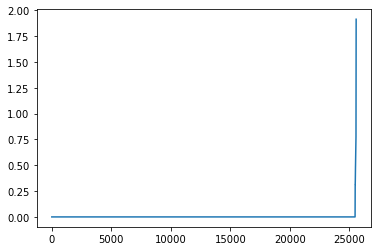

In [8]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
db = DBSCAN(eps=0.02, min_samples=100).fit(data)

labels=db.labels_


from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(data,labels))






0.6938272487389938


In [11]:
n_clusters

21

In [12]:
n_noise_ = list(labels).count(-1)


print("Estimated number of noise points: %d" % n_noise_)



Estimated number of noise points: 5604


In [13]:
l=list(labels)
cl_labels=[0] *n_clusters

In [14]:
for i in range(len(l)):
    if l[i]!=-1:
        cl_labels[l[i]]=cl_labels[l[i]]+1

In [15]:
for i in range(len(cl_labels)):
    print(i,"  ",cl_labels[i])
#cl_labels

0    320
1    162
2    184
3    129
4    131
5    108
6    108
7    2753
8    3357
9    153
10    112
11    117
12    8903
13    1153
14    231
15    231
16    230
17    231
18    231
19    231
20    888


##  T-SNE

In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [17]:
model = TSNE(n_components = 2, random_state = 0)

In [18]:
tsne_data = model.fit_transform(data)

In [19]:
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

In [20]:
import seaborn

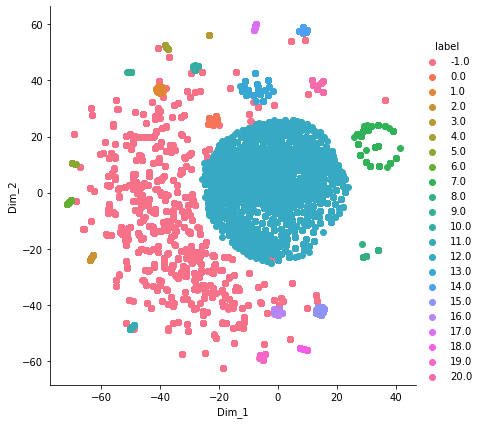

In [21]:
seaborn.FacetGrid(tsne_df, hue ="label", height = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

In [22]:
plt.savefig('Clusters.png')

<Figure size 432x288 with 0 Axes>

# Anamoly Scoring